In [ ]:
!pip install librosa
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
from librosa import display
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
import numpy as np
import math
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_with_plane, sampling_rate_with_plane = librosa.load("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /sample_audio_with_plane.mp3")

len(audio_with_plane), sampling_rate_with_plane, len(audio_with_plane)/sampling_rate_with_plane

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(330750, 22050, 15.0)

In [ ]:
audio_without_plane, sampling_rate_without_plane = librosa.load("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /sample_audio_without_plane.mp3")

len(audio_without_plane), sampling_rate_without_plane, len(audio_without_plane)/sampling_rate_without_plane

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(330750, 22050, 15.0)

In [ ]:
max_freq = 0
min_freq = 10000

n = len(audio_with_plane)
T = 1/sampling_rate_with_plane
xf = np.linspace(0.0, 1.0/(2.0*T), n//2)

max_freq = max(max_freq, max(list(xf)))
min_freq = min(min_freq, min(list(xf)))

n = len(audio_without_plane)
T = 1/sampling_rate_without_plane
xf = np.linspace(0.0, 1.0/(2.0*T), n//2)

max_freq = max(max_freq, max(list(xf)))
min_freq = min(min_freq, min(list(xf)))


In [ ]:
def fft_plot(audio, sampling_rate):
  n = len(audio)
  T = 1/sampling_rate
  yf = scipy.fft.fft(audio)
  xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
  fig, ax = plt.subplots()
  ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
  plt.grid()
  plt.xlabel("Frequency -->")
  plt.ylabel("Magnitude -->")
  return plt.show()

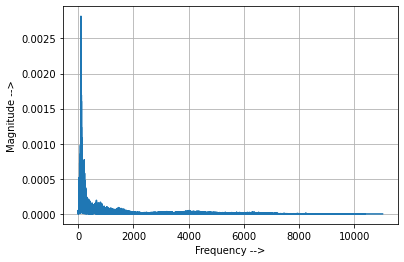

In [ ]:
fft_plot(audio_with_plane, sampling_rate_with_plane)

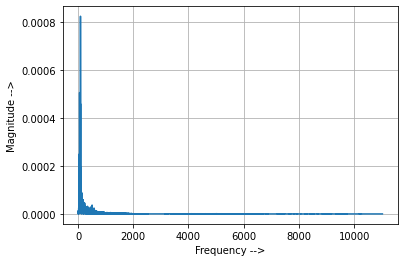

In [ ]:
fft_plot(audio_without_plane, sampling_rate_without_plane)

In [ ]:
def features_12(audio, sampling_rate):
  n = len(audio)
  T = 1/sampling_rate
  yf = scipy.fft.fft(audio)
  xf = list(np.linspace(0.0, 1.0/(2.0*T), n//2))
  yf = list(2.0/n * np.abs(yf[:n//2]))

  zipped_pairs = zip(yf, xf)
  sorted_zp = sorted(zipped_pairs)
  frequencies = [x for _, x in sorted_zp]
  magnitudes = [y for y, _ in sorted_zp]

  # max_freq = max(frequencies)
  # min_freq = min(frequencies)
  sum_features = [0 for i in range(12)]
  cnt_features = [0 for i in range(12)]

  for i in range(len(frequencies)):
    index = min(int(12*((frequencies[i]-min_freq)/math.ceil(max_freq-min_freq))), 11)
    cnt_features[index] += 1
    sum_features[index] += magnitudes[i]

  features = [0]*12
  for i in range(12):
    features[i] = sum_features[i]/max(1, cnt_features[i])

  return features

In [ ]:
features_with_plane = []
features_without_plane = []

for i in range(60):
  audio, sr = librosa.load("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /Audio Intervals with plane/audio_interval_with_plane_" + str(i+1) + ".mp3")
  features_with_plane.append(features_12(audio, sr))

  audio, sr = librosa.load("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /Audio Intervals without plane/audio_interval_without_plane_" + str(i+1) + ".mp3")
  features_without_plane.append(features_12(audio, sr))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
df_with_plane = pd.DataFrame(np.array(features_with_plane))
df_with_plane.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000465,0.000084,0.000023,0.000034,0.000014,0.000017,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002
1,0.000400,0.000068,0.000029,0.000027,0.000016,0.000015,0.000005,0.000004,0.000004,0.000005,0.000004,0.000004
2,0.000371,0.000061,0.000027,0.000019,0.000017,0.000015,0.000004,0.000003,0.000004,0.000003,0.000002,0.000001
3,0.000336,0.000061,0.000026,0.000018,0.000012,0.000009,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002
4,0.000401,0.000088,0.000030,0.000020,0.000020,0.000011,0.000004,0.000002,0.000002,0.000002,0.000002,0.000001


In [ ]:
df_without_plane = pd.DataFrame(np.array(features_without_plane))
df_without_plane.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000178,0.000026,0.000004,0.000003,0.000004,0.000003,0.000002,7.743807e-07,0.000001,0.000001,0.000001,3.718757e-07
1,0.000152,0.000026,0.000005,0.000003,0.000003,0.000002,0.000002,1.236295e-06,0.000001,0.000001,0.000001,1.028829e-06
2,0.000180,0.000031,0.000008,0.000004,0.000004,0.000003,0.000002,1.906795e-06,0.000001,0.000001,0.000002,2.092361e-06
3,0.000203,0.000027,0.000010,0.000006,0.000005,0.000004,0.000003,1.801698e-06,0.000001,0.000002,0.000001,2.360120e-06
4,0.000165,0.000015,0.000005,0.000004,0.000003,0.000003,0.000003,1.587451e-06,0.000003,0.000002,0.000002,8.950227e-07


In [ ]:
df_with_plane.to_csv("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /audio_with_plane.csv")
df_without_plane.to_csv("/content/drive/MyDrive/RC - Brain Inspired Deep Learning /audio_without_plane.csv")